In [1]:
import pickle
from keras.utils import np_utils
import numpy as np

Using TensorFlow backend.
C:\Users\manji\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\manji\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\manji\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\manji\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
X = pickle.load(open('x.pkl','rb')) #loading the pickle files
y = pickle.load(open('y.pkl','rb'))

In [3]:
y = np.array(y)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [5]:
X.shape

(2271, 100, 100)

In [6]:
X = X.reshape(-1,100,100,1) # for CNN model we need to reshape it to 4D array (batchsize,height,width and depth)

In [7]:
X.shape

(2271, 100, 100, 1)

In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D
from keras.utils import normalize
from keras import Input
from keras.callbacks import ModelCheckpoint

In [16]:
#Modeling CNN

In [23]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) #In CNN. input shpae has to be given in the first layer
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #
model.add(Conv2D(32,(3,3))) #2nd CNN layer with 32 filter with 3,3
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) # Converting to 1D matrix
# model.add(Dropout(0.5))
model.add(Dense(128)) #128 neurons in the hidden layers
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax')) #Final layers of 2 layers same as the output to predict
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 98, 98, 64)        640       
_________________________________________________________________
activation_26 (Activation)   (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_27 (Activation)   (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16928)            

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [26]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)


Train on 1838 samples, validate on 205 samples
Epoch 1/20
1838/1838 [==============================] - 44s 24ms/step - loss: 0.4436 - accuracy: 0.7497 - val_loss: 0.1146 - val_accuracy: 0.9659
Epoch 2/20
1838/1838 [==============================] - 37s 20ms/step - loss: 0.1615 - accuracy: 0.9548 - val_loss: 0.0902 - val_accuracy: 0.9707
Epoch 3/20
1838/1838 [==============================] - 37s 20ms/step - loss: 0.1094 - accuracy: 0.9701 - val_loss: 0.0606 - val_accuracy: 0.9805
Epoch 4/20
1838/1838 [==============================] - 37s 20ms/step - loss: 0.0846 - accuracy: 0.9766 - val_loss: 0.0708 - val_accuracy: 0.9756
Epoch 5/20
1838/1838 [==============================] - 37s 20ms/step - loss: 0.0795 - accuracy: 0.9733 - val_loss: 0.0504 - val_accuracy: 0.9854
Epoch 6/20
1838/1838 [==============================] - 36s 20ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0545 - val_accuracy: 0.9805
Epoch 7/20
1838/1838 [==============================] - 37s 20ms/step - loss

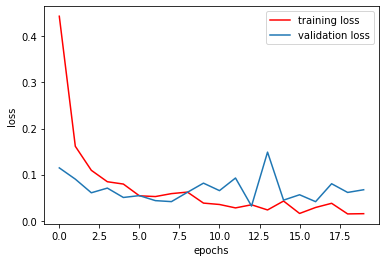

In [27]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

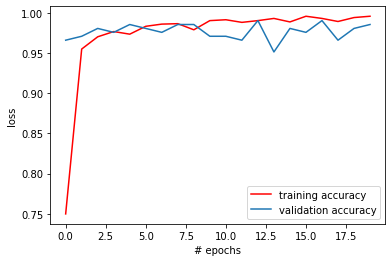

In [28]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
print(model.evaluate(X_test,y_test)) #Evaluating the model with the help of test datas

228/228 [==============================] - 2s 7ms/step
[0.09437262456673093, 0.9824561476707458]


In [31]:
model.save(r'Covid_model') #Saving the model with weights to our local directory for further prediction